In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Introduction to AI and OpenVino
## Session 11

## Implementation of MP Neuron.
### Note: for ease of explanation, used modified csv file only
<div>
<img src='../../images/prasami_color_tutorials_small.png' width='400' alt="By Pramod Sharma : pramod.sharma@prasami.com" align="left"/>
    </div>

In [2]:
###-----------------
### Import libraries
###-----------------

import os  # Operating system-related functions and utilities
import numpy as np  # NumPy for numerical computations
import pandas as pd  # Pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Matplotlib for data visualization

from sklearn.model_selection import train_test_split  # for train-test splitting
from sklearn.metrics import accuracy_score  # for accuracy score calculation

## 2. Setup Global Parameters

In [3]:
###------------------
### Global Parameters
###------------------

# Directories
inpDir = '../../input'
outDir = '../output'


RANDOM_STATE = 42 
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

TEST_SIZE  = 0.2 # Size of test data

# Parameters for plotting
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large',
         }

CMAP = plt.cm.coolwarm

plt.rcParams.update(params)

plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

## 3. Load Data Set

<div class="alert alert-block alert-info" style="font-family: Arial; font-size:1.1em;">
This data is generated from SKLearn Breast Cancer data.
</div>

In [4]:
# read CSV from the disk
data_df = pd.read_csv(os.path.join(inpDir, 'breast_cancer_mod.csv'))
data_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,1,1,0
1,0,1,0,0,0,0,0,0,0,1,...,1,0,1,0,1,1,0,1,1,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
4,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
565,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
566,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
567,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [5]:
data_df.target.value_counts()

target
1    357
0    212
Name: count, dtype: int64

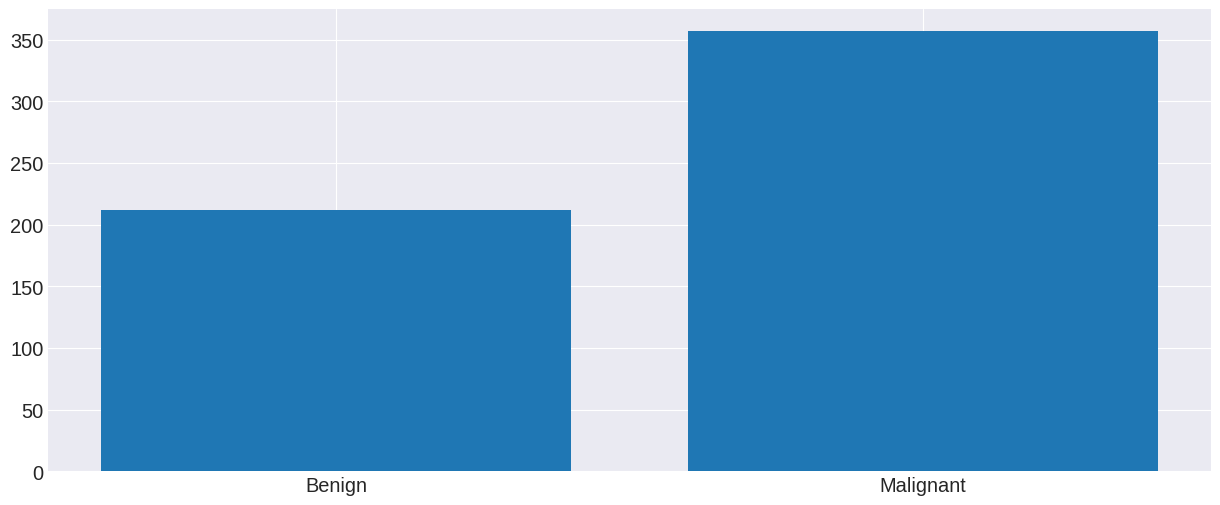

In [6]:
class_names = ['Malignant', 'Benign']
fig, ax = plt.subplots()
ax.bar(data_df.target.value_counts().index, data_df.target.value_counts());
ax.set_xticks(data_df.target.value_counts().index)
ax.set_xticklabels(class_names);

In [7]:
features_df = data_df.drop('target', axis = 1)

labels_df = data_df.target

In [8]:
# splitting in test and train
X_train, X_test, y_train, y_test = train_test_split(features_df, labels_df,
                                                   test_size=TEST_SIZE,
                                                   stratify=labels_df,
                                                   random_state=RANDOM_STATE)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [9]:
# add a column with totals
X_train['total'] = X_train.astype(np.int16).sum(axis = 1)
# add the target column
X_train['target'] = y_train
# sort in ascending order
X_train.sort_values('total', inplace = True)

X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,1,1,12,0
2,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,13,0
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,14,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,14,0
7,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,15,0


In [10]:
# add a column with totals
X_test['total'] = X_test.astype(np.int16).sum(axis = 1)
# add the target column
X_test['target'] = y_test
# sort in ascending order
X_test.sort_values('total', inplace = True)

X_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
1,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,1,0,1,1,13,0
14,0,1,0,1,0,0,0,0,0,1,...,0,1,0,1,1,0,0,1,17,0
20,1,1,1,1,1,0,1,1,0,0,...,1,1,0,0,0,0,0,0,18,0
21,1,1,1,1,0,0,1,1,0,0,...,1,1,0,0,0,0,0,0,19,0
39,0,1,0,1,0,1,0,0,1,1,...,0,0,1,1,0,0,1,1,20,0


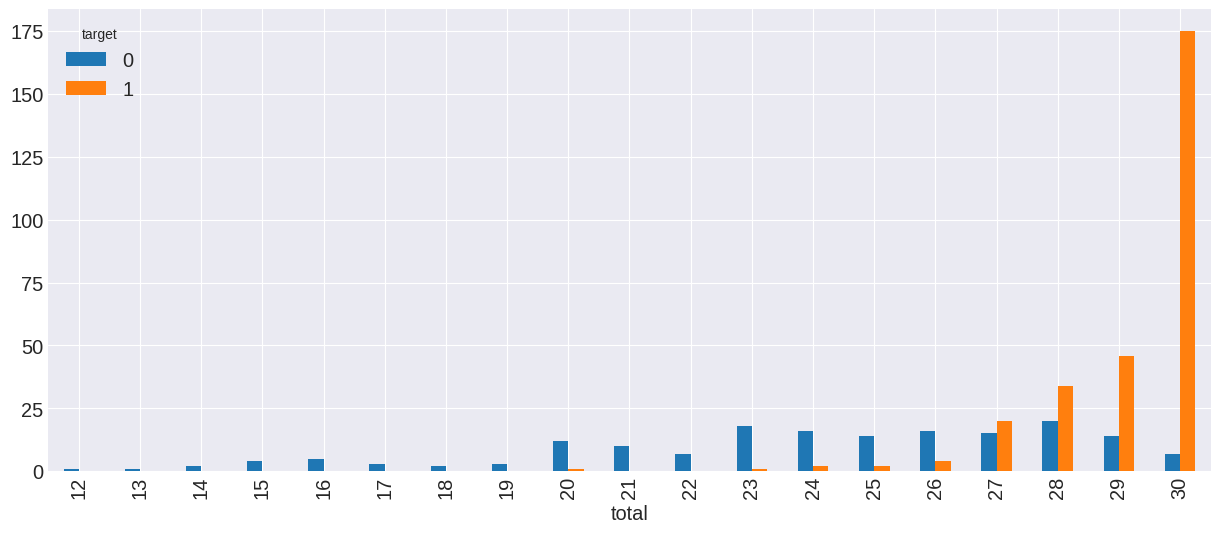

In [11]:
tmp_df = X_train.groupby(['total', 'target']).agg({'target': 'count'})

tmp_df.columns = ['count']

tmp_df.reset_index(inplace=True)

tmp_df.pivot(index = 'total', 
             columns = 'target', 
             values='count').plot(kind = 'bar');

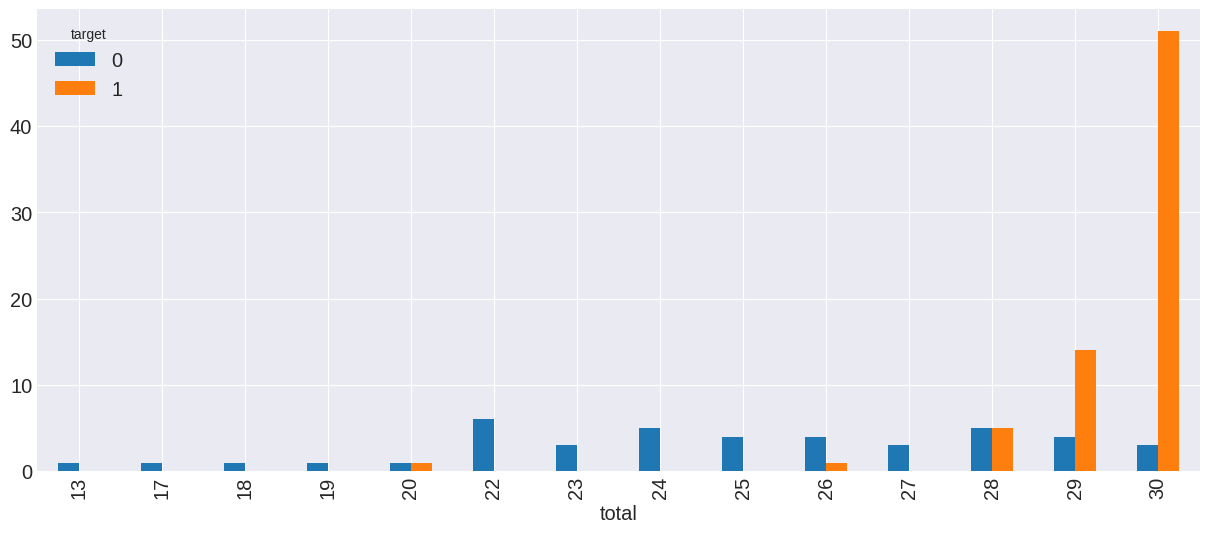

In [12]:
tmp_df = X_test.groupby(['total', 'target']).agg({'target': 'count'})

tmp_df.columns = ['count']

tmp_df.reset_index(inplace=True)

tmp_df.pivot(index = 'total', 
             columns = 'target', 
             values='count').plot(kind = 'bar');

In [13]:
accuracy = {}

# loop over all row
for b in np.arange(X_train.shape[1]):
    X_train['pred'] = X_train['total'] >= b
    accuracy[b] = accuracy_score(X_train['pred'], X_train['target'])
    

In [14]:
accuracy

{0: 0.6263736263736264,
 1: 0.6263736263736264,
 2: 0.6263736263736264,
 3: 0.6263736263736264,
 4: 0.6263736263736264,
 5: 0.6263736263736264,
 6: 0.6263736263736264,
 7: 0.6263736263736264,
 8: 0.6263736263736264,
 9: 0.6263736263736264,
 10: 0.6263736263736264,
 11: 0.6263736263736264,
 12: 0.6263736263736264,
 13: 0.6285714285714286,
 14: 0.6307692307692307,
 15: 0.6351648351648351,
 16: 0.643956043956044,
 17: 0.654945054945055,
 18: 0.6615384615384615,
 19: 0.6659340659340659,
 20: 0.6725274725274726,
 21: 0.6967032967032967,
 22: 0.7186813186813187,
 23: 0.734065934065934,
 24: 0.7714285714285715,
 25: 0.8021978021978022,
 26: 0.8285714285714286,
 27: 0.8549450549450549,
 28: 0.843956043956044,
 29: 0.8131868131868132,
 30: 0.7428571428571429,
 31: 0.37362637362637363}

In [15]:
best_b = max(accuracy, key = accuracy.get)

print ('Highest accuracy was {1:7.3f} at threshold of {0:4d}'.format(best_b, 
                                                                     accuracy[best_b]))

Highest accuracy was   0.855 at threshold of   27


In [16]:
X_test['pred'] = X_test['total'] >= best_b
accuracy_test = accuracy_score(X_test['pred'], X_test['target'])
print ('Test accuracy was{0:6.3f}'.format(accuracy_test))

Test accuracy was 0.851
